<a href="https://colab.research.google.com/github/rromerov/Proyecto_Integrador/blob/DataSetExtender/Avance3/Avance3.12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instituto Tecnológico y de Estudios Superiores de Monterrey
## Maestría en Inteligencia Artificial Aplicada
### Proyecto Integrador (Gpo 10) - TC5035.10

### **Proyecto: Diseño Acelerado de Fármacos**

### Avance 3: Baseline

#### **Docentes:**
- Dra. Grettel Barceló Alonso - Profesor Titular
- Dr. Luis Eduardo Falcón Morales - Profesor Titular
- Dr. Ricardo Ambrocio Ramírez Mendoza  – Profesor Tutor

#### **Miembros del equipo:**
- Ernesto Enríquez Rubio - A01228409
- Roberto Romero Vielma - A00822314
- Herbert Joadan Romero Villarreal –  A01794199



---


### Baseline
#### Background:

El proyecto tiene como objetivo predecir las propiedades de las moléculas presentes en la base de datos ChEMBL (Chemistry for Biology) utilizando un modelo de Machine Learning en este caso probaremos el rendimiento basado en Random Forest y después de generar nuestra base de datos utilizando el script de Paddle. ChEMBL es una extensa base de datos de compuestos bioactivos con información sobre sus propiedades y actividades biológicas.

Random Forest se posiciona como una herramienta poderosa y versátil para comenzar en proyectos de Drug Discovery. Su facilidad de uso, robustez, precisión, capacidad para manejar grandes conjuntos de datos, interpretabilidad de resultados, versatilidad y amplia comunidad lo convierten en una opción atractiva para investigadores que buscan adentrarse en este campo.



---

### Selección de características

Los "fingerprints" generados por el script de PaDEL (PAirwise Distance based Enhanced fingerprints and Linear fingerprints) son representaciones de las características moleculares de compuestos químicos. En el contexto del Drug Discovery, los fingerprints se utilizan para describir las propiedades estructurales y químicas de las moléculas, permitiendo su comparación y análisis en estudios de relación estructura-actividad (SAR).

**Fingerprints en Drug Discovery**

Los fingerprints son vectores binarios o numéricos que representan la presencia o ausencia de ciertas subestructuras, características moleculares, o propiedades químicas dentro de una molécula.

*PaDEL-Descriptor:*

PaDEL-Descriptor es una herramienta de software ampliamente utilizada para generar una variedad de fingerprints moleculares y descriptores numéricos. Es compatible con varios formatos de entrada de moléculas y genera descriptores y fingerprints que pueden ser utilizados en análisis quimiométricos y modelos predictivos.

*Tipos de Fingerprints:*

*   Molecular Fingerprints: Representan la presencia de subestructuras específicas dentro de la molécula.
*   MACCS Keys: Un conjunto de 166 bits que representan características moleculares comunes.
* PubChem Fingerprints: Basados en la base de datos PubChem, estos fingerprints contienen 881 bits.
* Extended Connectivity Fingerprints (ECFP): También conocidos como fingerprints circulares, que representan características locales de átomos extendiéndose a sus vecinos a diferentes niveles.
* Path-based Fingerprints: Capturan la presencia de caminos de átomos y enlaces de diferentes longitudes en la molécula.


*Generación de Fingerprints con PaDEL:*

El script de PaDEL toma como entrada archivos que describen moléculas  y genera fingerprints para cada molécula. Los fingerprints resultantes son útiles para realizar tareas como clustering, clasificación, regresión, y análisis de similitud. En este caso utilizaremos el script para generar PubChem Fingerprints y poder utilizarlos para el modelo de bosque aleatorio.

Los fingerprints moleculares pueden beneficiar significativamente a un modelo de Random Forest (bosque aleatorio) en el contexto de Drug Discovery de las siguientes maneras específicas:

* Vectorización de Características: Los fingerprints convierten las propiedades moleculares en vectores binarios o numéricos, lo cual es ideal para el input de modelos de machine learning como Random Forest.
* Captura de Información Compleja: Al encapsular subestructuras moleculares y características químicas en un formato estándar, los fingerprints permiten que el Random Forest trabaje con una representación simplificada pero rica de las moléculas.
* Importancia de Características: Random Forest puede evaluar la importancia de cada característica del fingerprint, identificando qué subestructuras moleculares son más relevantes para las predicciones. Esto es valioso en Drug Discovery para comprender qué características influyen más en la actividad biológica.
* Reducción del Overfitting: Los modelos de Random Forest, al promediar múltiples árboles, son menos propensos a sobreajustarse a los datos de entrenamiento, especialmente cuando trabajan con datos de alta dimensionalidad como los fingerprints.
* Relaciones No Lineales: Random Forest es efectivo para capturar relaciones no lineales entre los fingerprints y la actividad biológica, lo cual es crucial dado que las relaciones moleculares pueden ser complejas y no lineales.
* Escalabilidad: Random Forest maneja bien conjuntos de datos grandes y complejos, comunes en Drug Discovery, donde cada compuesto se describe con numerosos descriptores.

Para evaluar y optimizar la eficiencia de un modelo de Random Forest utilizando fingerprints, es importante ajustar y considerar varios parámetros del modelo.


*    Número de Árboles (n_estimators):

Descripción: Este parámetro define el número de árboles en el bosque.

Efecto: Incrementar el número de árboles generalmente mejora la precisión del modelo hasta cierto punto, pero también aumenta el tiempo de computación.

Consideración: Buscar un equilibrio entre la precisión y el tiempo de entrenamiento. Valores típicos comienzan desde 100 hasta 1000 árboles.
*   Número Máximo de Características (max_features):

Descripción: Define el número de características a considerar al buscar la mejor división.

Efecto: Un valor más alto puede mejorar la precisión del modelo, pero también puede aumentar la posibilidad de overfitting.

Consideración: Se puede probar varios valores, como sqrt(n_features) o log2(n_features), donde n_features es el número total de características.
* Profundidad Máxima de los Árboles (max_depth):

Descripción: Limita la profundidad máxima de los árboles.

Efecto: Limitar la profundidad puede evitar el overfitting, especialmente en conjuntos de datos de alta dimensionalidad como los fingerprints.

Consideración: Valores típicos para empezar pueden ser entre 10 y 50, dependiendo de la complejidad de los datos.
* Mínimo de Muestras para Dividir un Nodo (min_samples_split):

Descripción: El número mínimo de muestras necesarias para dividir un nodo.

Efecto: Valores más altos pueden llevar a árboles más generales y prevenir overfitting.

Consideración: Comúnmente se prueban valores desde 2 hasta 10.
* Mínimo de Muestras en una Hoja (min_samples_leaf):

Descripción: El número mínimo de muestras que un nodo hoja debe tener.

Efecto: Valores más altos pueden llevar a árboles más generales.

Consideración: Valores típicos van desde 1 hasta 10.
* Peso de las Clases (class_weight):

Descripción: Ajusta el peso de las clases en el caso de datos desbalanceados.

Efecto: Ayuda a mejorar la precisión en la predicción de la clase minoritaria.

Consideración: Puede configurarse a balanced para ajustar automáticamente los pesos según la frecuencia de las clases.
* Criterio de División (criterion):

Descripción: La función para medir la calidad de una división.

Efecto: Los criterios comunes son "gini" e "entropy" para clasificación, y "mse" para regresión.

Consideración: Experimenta con ambos para ver cuál funciona mejor en tu caso.
* Bootstrap

Descripción: Indica si se utiliza el muestreo con reemplazo al construir árboles.

Efecto: Utilizar bootstrap=True puede mejorar la robustez del modelo.

Consideración: Normalmente se deja en True, pero puede ser probado con False para ver el impacto.


**Evaluación del Modelo**

Para evalúar la eficiencia del modelo se puede utilizar métricas de rendimiento como:

Accuracy: roporción de predicciones correctas sobre el total de predicciones realizadas.

* Interpretación: Una alta exactitud indica que el modelo está haciendo un buen trabajo clasificando correctamente las instancias, pero puede ser engañosa si las clases están desbalanceadas.

Precision: Proporción de verdaderos positivos sobre el total de positivos predichos.
* Interpretación: Alta precisión significa que cuando el modelo predice una clase positiva, es correcto la mayoría de las veces. Es especialmente útil cuando el costo de un falso positivo es alto.

Recall: Proporción de verdaderos positivos sobre el total de positivos reales.
* Interpretación: Un alto recall indica que el modelo está capturando la mayoría de los positivos reales. Es importante cuando el costo de un falso negativo es alto.

F1-Score: Media armónica de precisión y recall.
* Interpretación: Proporciona un equilibrio entre precisión y recall. Es útil cuando las clases están desbalanceadas y se necesita una única métrica que considere ambos aspectos.

ROC-AUC: Área bajo la curva ROC, que es una gráfica de la tasa de verdaderos positivos frente a la tasa de falsos positivos.
* Interpretación: Un valor de AUC cercano a 1 indica un modelo excelente, mientras que un valor cercano a 0.5 indica un modelo que no es mejor que el azar.

Cross-Validation: : Dividir los datos en múltiples subconjuntos y realizar múltiples rondas de entrenamiento y evaluación.
* Interpretación: Proporciona una mejor estimación del rendimiento del modelo en datos no vistos al reducir la varianza asociada con una única división de datos.









---

### Código para el modelo

In [1]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from google.colab import drive
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import learning_curve
import numpy as np

In [2]:
# Cargar Google Drive al notebook
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Cargar el dataset
ruta_archivo_bioactivity = '/content/drive/My Drive/Colab Notebooks/data/bioactivity_data_2class_pIC50_pubchem_fp.csv'

# Lee el archivo CSV en un DataFrame
df_bioactivity = pd.read_csv(ruta_archivo_bioactivity)

# Mostrar que se haya importado correctamente el archivo
df_bioactivity.head(5)


,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.240316
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.263427
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.228692
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.278444
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.228692


#### Etiquetas y variable objetivo

The Neuropilin-1 data set contains 881 input features and 1 output variable (pIC50 values).


In [4]:
# Se define conjunto X para las etiquetas
X = df_bioactivity.drop('pIC50', axis=1)
# Mostrar contenido en el conjunto de X
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10405,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10406,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10407,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10408,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Se define variable Y para el objetivo
Y = df_bioactivity.pIC50
# Mostrar contenido en el conjunto de Y
Y

0        0.240316
1        0.263427
2        0.228692
3        0.278444
4        0.228692
           ...   
10405    0.328904
10406    0.438249
10407    0.423907
10408    0.443855
10409    0.432702
Name: pIC50, Length: 10410, dtype: float64

#### Dimensión de los conjuntos



In [6]:
# Dimensiones de las variables predictoras
X.shape

(10410, 881)

In [7]:
# Dimensiones de la variable predicha
Y.shape

(10410,)

Eliminamos columnas con baja varianza


In [8]:
# Creamos un objeto VarianceThreshold con el umbral definido
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
# Transformamos la matriz de características X utilizando el objeto VarianceThreshold
X = selection.fit_transform(X)

In [9]:
# Dimensiones de las variables predictoras
X.shape

(10410, 152)

#### Data split

(80/20 ratio)

In [10]:
# Dividimos los datos en dos conjuntos, los de entrenamiento y los de prueba, teniendo los últimos un 20% de las muestras
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
# Dimensiones del conjunto de entrenamiento
X_train.shape, Y_train.shape

((8328, 152), (8328,))

In [11]:
# Dimensiones del conjunto de prueba
X_test.shape, Y_test.shape

((2082, 152), (2082,))

#### Modelo de regresión con Random Forest



In [12]:
# Objeto RandomForestRegressor con el número de árboles definido
model = RandomForestRegressor(n_estimators=100)
# Entrenamiento del modelo
model.fit(X_train, Y_train)
# Cálculo del puntaje R^2 del modelo en los datos de prueba X_test e Y_test
r2 = model.score(X_test, Y_test)
r2

0.6207643358971922

In [13]:
# Predicciones sobre los datos de prueba X_test
Y_pred = model.predict(X_test)

In [14]:
# Predicciones en el conjunto de entrenamiento
Y_train_pred = model.predict(X_train)

### Gráficos de dispersión de los valores pIC50 expirementales contra los predichos

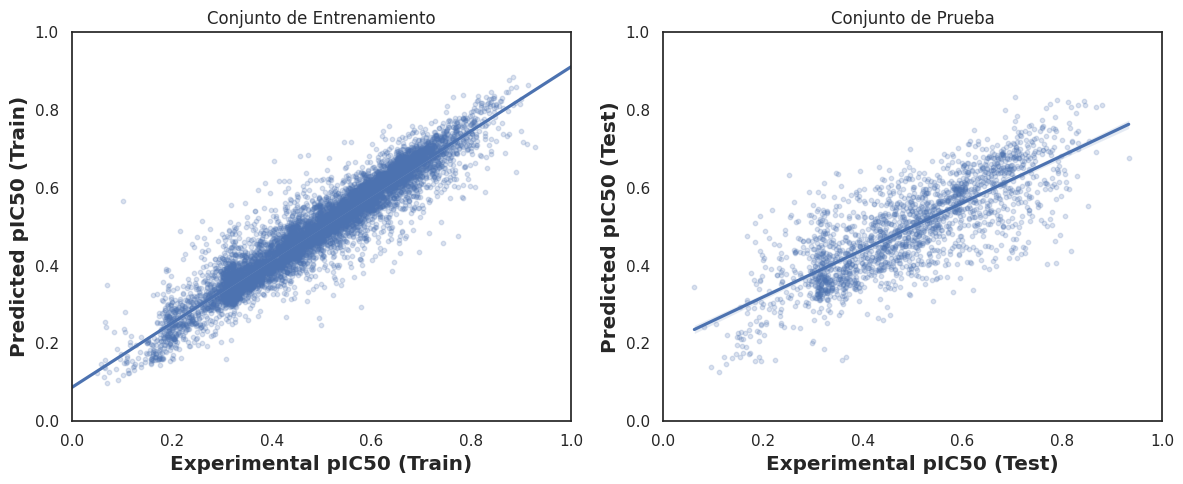

In [15]:
# Gráfico de predicciones del conjunto de entrenamiento
sns.set(color_codes=True)
sns.set_style("white")

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Función para añadir jitter
def add_jitter(arr, noise=0.01):
    return arr + np.random.normal(0, noise, arr.shape)

# Gráfico para el conjunto de entrenamiento con jitter y menor opacidad
sns.regplot(x=add_jitter(Y_train), y=add_jitter(Y_train_pred), scatter_kws={'alpha':0.2, 's':10}, ax=ax[0])
ax[0].set_xlabel('Experimental pIC50 (Train)', fontsize='large', fontweight='bold')
ax[0].set_ylabel('Predicted pIC50 (Train)', fontsize='large', fontweight='bold')
ax[0].set_xlim(0, 1)
ax[0].set_ylim(0, 1)
ax[0].set_title('Conjunto de Entrenamiento')

# Gráfico para el conjunto de prueba con jitter y menor opacidad
sns.regplot(x=add_jitter(Y_test), y=add_jitter(Y_pred), scatter_kws={'alpha':0.2, 's':10}, ax=ax[1])
ax[1].set_xlabel('Experimental pIC50 (Test)', fontsize='large', fontweight='bold')
ax[1].set_ylabel('Predicted pIC50 (Test)', fontsize='large', fontweight='bold')
ax[1].set_xlim(0, 1)
ax[1].set_ylim(0, 1)
ax[1].set_title('Conjunto de Prueba')

plt.tight_layout()
plt.show()

### **Análisis del Modelo**

**Desempeño en el Conjunto de Entrenamiento**

En la gráfica del conjunto de entrenamiento (izquierda), observamos que las predicciones del modelo (Predicted pIC50) se alinean razonablemente bien con los valores experimentales (Experimental pIC50), aunque la relación lineal muestra cierta dispersión. Esto sugiere que el modelo ha capturado algunas de las tendencias en los datos de entrenamiento, pero no con una precisión perfecta.

**Desempeño en el Conjunto de Prueba**

En la gráfica del conjunto de prueba (derecha), las predicciones del modelo muestran una mayor dispersión y una alineación más débil con los valores experimentales. La relación lineal es menos pronunciada, lo que indica que el modelo tiene dificultades para generalizar a datos no vistos durante el entrenamiento.

**Evaluación del Modelo**

El desempeño del modelo en el conjunto de entrenamiento es mejor que en el conjunto de prueba, lo que sugiere que el modelo podría estar sobreentrenado. Sin embargo, la diferencia no es extremadamente marcada. La dispersión en ambas gráficas indica que el modelo no está capturando todas las variabilidades de los datos.

**Conclusión**

Basado en las gráficas obtenidas, el modelo muestra indicios de sobreentrenamiento. El modelo ha aprendido algunos patrones en los datos de entrenamiento, pero no puede generalizar bien a nuevos datos (conjunto de prueba). Este comportamiento puede atribuirse a la complejidad del modelo o a una posible necesidad de más datos de entrenamiento.

### Conclusiones de fase "Baseline"

**Justificación del Algoritmo Seleccionado**

Para abordar el problema de identificar compuestos químicos que inhiban la proteína VEGF165, se seleccionó el algoritmo de Random Forest. Esta elección es adecuada por varias razones:

1. **Datos Estructurados:** El problema maneja datos estructurados, específicamente descriptores químicos representados como fingerprints moleculares generados mediante PaDEL. Random Forest es muy eficaz para este tipo de datos debido a su capacidad para manejar una gran cantidad de características y detectar interacciones complejas entre ellas.

2. **Cantidad de Datos:** Random Forest es robusto y puede trabajar eficientemente con conjuntos de datos de tamaño moderado. Además, al ser un ensemble de árboles, reduce el riesgo de sobreentrenamiento en comparación con un solo árbol de decisión.

3. **Relevancia de las Características:** Todos los descriptores están representados mediante fingerprints y, por lo tanto, no se considera que algunas características sean más importantes que otras a priori. La selección de características mediante VarianceThreshold se utiliza para eliminar aquellas con baja variabilidad, asegurando que sólo se incluyan características relevantes y con información.

4. **Interpretabilidad:** Aunque los modelos de Random Forest no son tan interpretables como los modelos lineales, su capacidad para manejar grandes conjuntos de datos y muchas características sin necesidad de una ingeniería de características exhaustiva hace que sea una herramienta poderosa para este tipo de problemas.

**Análisis de la Relevancia de las Características**

Se utilizó la técnica de selección de características **VarianceThreshold** para eliminar las características con baja variabilidad, lo que ayuda a reducir el ruido y mejorar la eficiencia del modelo.

**Comparación de Métricas de Evaluación**
Para evaluar el modelo, se utilizó el coeficiente de determinación
${R^2}$ debido a su relevancia en este contexto. ${R^2}$ mide la proporción de la variabilidad en la variable dependiente (pIC50) que es explicada por las características independientes del modelo. Es una métrica adecuada ya que:

1. **Contexto del Negocio:** Dado que el objetivo es identificar compuestos con el menor pIC50, un alto ${R^2}$ indicará que el modelo explica bien la variabilidad en pIC50, lo que es crucial para seleccionar los compuestos más prometedores.

2. **Interpretación:** ${R^2}$ proporciona una interpretación clara y directa sobre el desempeño del modelo en términos de explicación de la varianza, facilitando la toma de decisiones en el contexto de la investigación química.

**Desempeño Mínimo Esperado**

El objetivo primordial al desarrollar un modelo de regresión es obtener un coeficiente de determinación ${R^2}$ lo más cercano posible a 1. Este indicador refleja la proporción de la variabilidad en la variable objetivo que es explicada por el modelo. Tradicionalmente, los modelos de regresión lineal han sido utilizados como modelos base en muchas aplicaciones, incluyendo la predicción de niveles de pIC50. Sin embargo, estos modelos tienen limitaciones importantes, como asumir una relación lineal entre las variables predictoras y la variable objetivo, así como la sensibilidad a valores atípicos y la incapacidad para manejar relaciones no lineales y complejas en los datos.

Para superar estas limitaciones, se ha optado por un enfoque alternativo utilizando un regresor de random forest. Los random forests son un tipo de algoritmo de aprendizaje automático que se basa en el ensamblaje de múltiples árboles de decisión, lo que les permite capturar relaciones no lineales y complejas en los datos. Son robustos frente a valores atípicos y menos sensibles a la multicolinealidad, lo que los hace especialmente adecuados para manejar conjuntos de datos con múltiples variables predictoras y relaciones no lineales.

En el ámbito de la investigación científica, donde la precisión y la interpretabilidad son fundamentales, se considera que un ${R^2}$ superior a 0.5 proporciona un buen punto de partida para futuros modelos. Esto se debe a que un ${R^2}$ de 0.5 indica que el modelo explica el 50% de la variabilidad en los datos, lo cual es significativo en muchos contextos científicos.

Dado que el modelo baseline propuesto, que predice la media de la variable objetivo, alcanza un ${R^2}$ de 0.62, se considera que supera este umbral y, por lo tanto, es aceptable como punto de partida. Este valor indica que el modelo baseline es capaz de explicar el 62% de la variabilidad en los datos, lo que sugiere que es mejor que simplemente predecir la media y proporciona una base sólida para futuros refinamientos y mejoras en el modelo.

**Conclusión final**

El modelo Random Forest es apropiado para el problema de identificar compuestos químicos que inhiban la proteína VEGF165 debido a su capacidad para manejar datos estructurados con muchas características y proporcionar información sobre la importancia de las mismas. Aunque el modelo muestra signos de sobreentrenamiento, es posible mejorar su generalización con técnicas adicionales. El coeficiente de determinación ${R^2}$ es la métrica más adecuada para evaluar este modelo, dado su alineamiento con los objetivos del problema y su capacidad para proporcionar una interpretación clara de la variabilidad explicada en pIC50. Con estos ajustes y consideraciones, el modelo puede ser una herramienta valiosa para seleccionar los compuestos más prometedores.

## Referencias bibliográficas
Yap, C. W. (2011). PaDEL‐descriptor: An open source software to calculate molecular descriptors and fingerprints. Journal of computational chemistry, 32(7), 1466-1474.

Segal, M. R. (2004). Machine learning benchmarks and random forest regression.

Gu, T., Yang, X., Li, M., Wu, M., Su, Q., Lu, W., & Zhang, Y. (2013). Predicting the DPP-IV inhibitory activity pIC50 based on their physicochemical properties. BioMed research international, 2013.